In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Virtual_Reality_in_Education_Impact.csv')

In [3]:
df.head()

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes


In [4]:
df.shape

(5000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Student_ID                                5000 non-null   object
 1   Age                                       5000 non-null   int64 
 2   Gender                                    5000 non-null   object
 3   Grade_Level                               5000 non-null   object
 4   Field_of_Study                            5000 non-null   object
 5   Usage_of_VR_in_Education                  5000 non-null   object
 6   Hours_of_VR_Usage_Per_Week                5000 non-null   int64 
 7   Engagement_Level                          5000 non-null   int64 
 8   Improvement_in_Learning_Outcomes          5000 non-null   object
 9   Subject                                   5000 non-null   object
 10  Instructor_VR_Proficiency                 5000 n

In [6]:
df.describe

<bound method NDFrame.describe of      Student_ID  Age             Gender    Grade_Level Field_of_Study  \
0      STUD0001   13         Non-binary   Postgraduate        Science   
1      STUD0002   16         Non-binary  Undergraduate       Medicine   
2      STUD0003   15  Prefer not to say    High School        Science   
3      STUD0004   24             Female   Postgraduate    Engineering   
4      STUD0005   22         Non-binary  Undergraduate           Arts   
...         ...  ...                ...            ...            ...   
4995   STUD4996   18               Male  Undergraduate    Engineering   
4996   STUD4997   25               Male    High School       Medicine   
4997   STUD4998   25             Female    High School    Engineering   
4998   STUD4999   22             Female  Undergraduate        Science   
4999   STUD5000   21               Male  Undergraduate       Medicine   

     Usage_of_VR_in_Education  Hours_of_VR_Usage_Per_Week  Engagement_Level  \
0         

# Data Cleaning

In [7]:
#identifying missing values
df.isnull().sum()

Student_ID                                  0
Age                                         0
Gender                                      0
Grade_Level                                 0
Field_of_Study                              0
Usage_of_VR_in_Education                    0
Hours_of_VR_Usage_Per_Week                  0
Engagement_Level                            0
Improvement_in_Learning_Outcomes            0
Subject                                     0
Instructor_VR_Proficiency                   0
Perceived_Effectiveness_of_VR               0
Access_to_VR_Equipment                      0
Impact_on_Creativity                        0
Stress_Level_with_VR_Usage                  0
Collaboration_with_Peers_via_VR             0
Feedback_from_Educators_on_VR               0
Interest_in_Continuing_VR_Based_Learning    0
Region                                      0
School_Support_for_VR_in_Curriculum         0
dtype: int64

In [8]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.columns = df.columns.str.lower()

In [10]:
# remove somes columns not relevant of the business case
columns_to_remove = [ 
    'subject',
    'collaboration_with_peers_via_vr', 
    'stress_level_with_vr_usage', 
    'feedback_from_educators_on_vr']

df.drop(columns=columns_to_remove, inplace=True)  # inplace=True modifies df directly

In [11]:
df.isnull().sum()

student_id                                  0
age                                         0
gender                                      0
grade_level                                 0
field_of_study                              0
usage_of_vr_in_education                    0
hours_of_vr_usage_per_week                  0
engagement_level                            0
improvement_in_learning_outcomes            0
instructor_vr_proficiency                   0
perceived_effectiveness_of_vr               0
access_to_vr_equipment                      0
impact_on_creativity                        0
interest_in_continuing_vr_based_learning    0
region                                      0
school_support_for_vr_in_curriculum         0
dtype: int64

# Saving cleaning data 

In [12]:
df.to_csv('cleaned_Virtual_Reality_in_Education_Impact.csv', index=False)

# EDA

## Exploring categorical variables

In [13]:
# Calculer le minimum et le maximum d'âge
age_min = df['age'].min()
age_max = df['age'].max()

print(f"L'âge minimum est: {age_min}")
print(f"L'âge maximum est: {age_max}")

L'âge minimum est: 12
L'âge maximum est: 30


In [40]:
# Summary statistics for 'age'
age_summary = df['age'].describe()
print("Age Summary Statistics:\n", age_summary)

Age Summary Statistics:
 count    5000.000000
mean       21.182200
std         5.461957
min        12.000000
25%        16.000000
50%        21.000000
75%        26.000000
max        30.000000
Name: age, dtype: float64


In [43]:
# Counts for 'gender'
df['gender'].value_counts()

gender
Male                 1274
Non-binary           1270
Prefer not to say    1236
Female               1220
Name: count, dtype: int64

In [42]:
# Counts for 'region'
region_counts = df['region'].value_counts()
print("Region Distribution:\n", region_counts)

Region Distribution:
 region
South America    868
Asia             853
Africa           840
North America    828
Europe           817
Oceania          794
Name: count, dtype: int64


In [44]:
df['field_of_study'].value_counts()

field_of_study
Science        747
Medicine       737
Business       727
Arts           709
Education      695
Engineering    694
Law            691
Name: count, dtype: int64

Age Distribution:
 age
12    247
13    242
14    259
15    267
16    253
17    242
18    239
19    271
20    264
21    286
22    265
23    257
24    265
25    284
26    277
27    257
28    270
29    281
30    274
Name: count, dtype: int64


C:\Users\johan\AppData\Local\Temp\ipykernel_14820\2355329162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='husl')


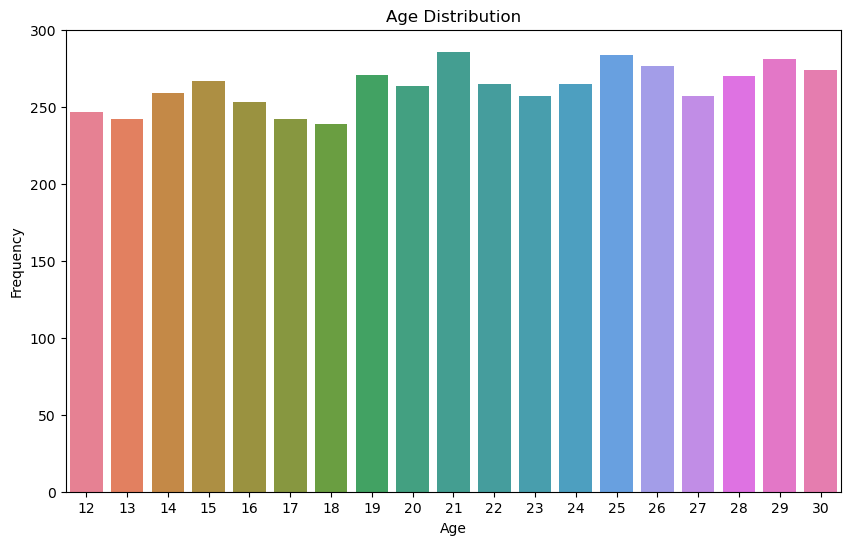

Gender Distribution:
 gender
Male                 1274
Non-binary           1270
Prefer not to say    1236
Female               1220
Name: count, dtype: int64


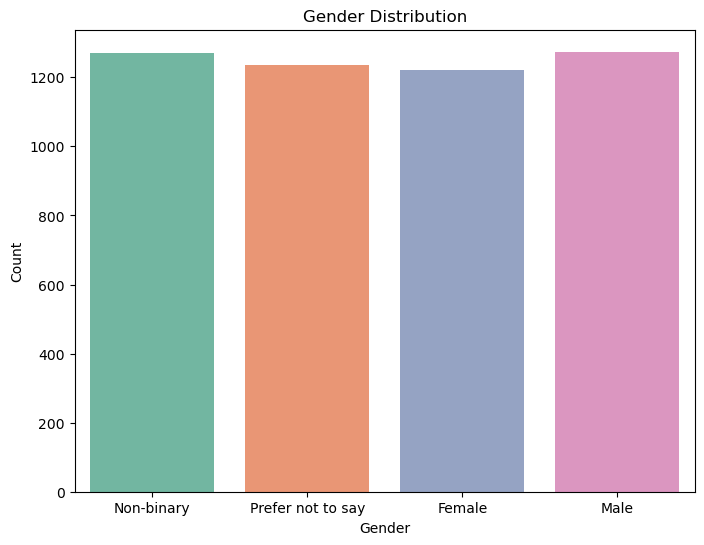

Region Distribution:
 region
South America    868
Asia             853
Africa           840
North America    828
Europe           817
Oceania          794
Name: count, dtype: int64


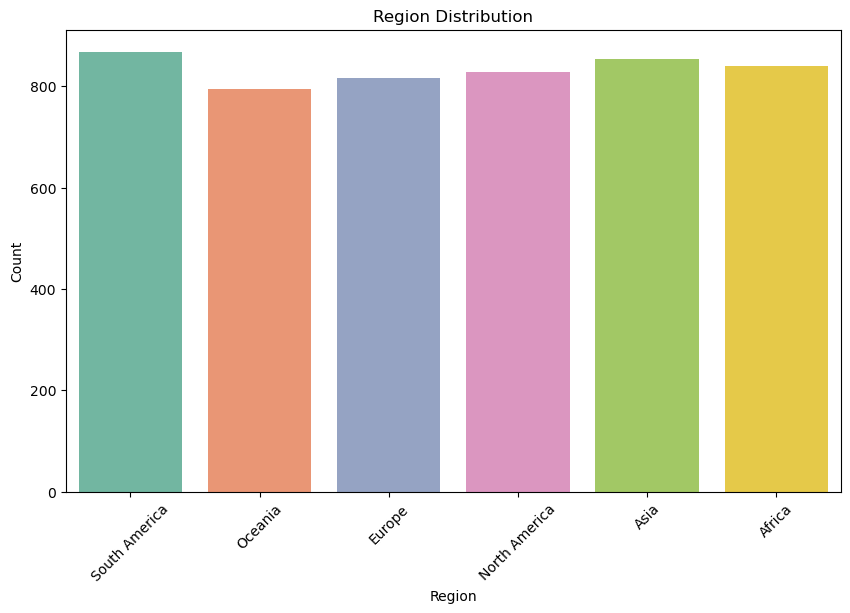

Field of Study Distribution:
 field_of_study
Science        747
Medicine       737
Business       727
Arts           709
Education      695
Engineering    694
Law            691
Name: count, dtype: int64


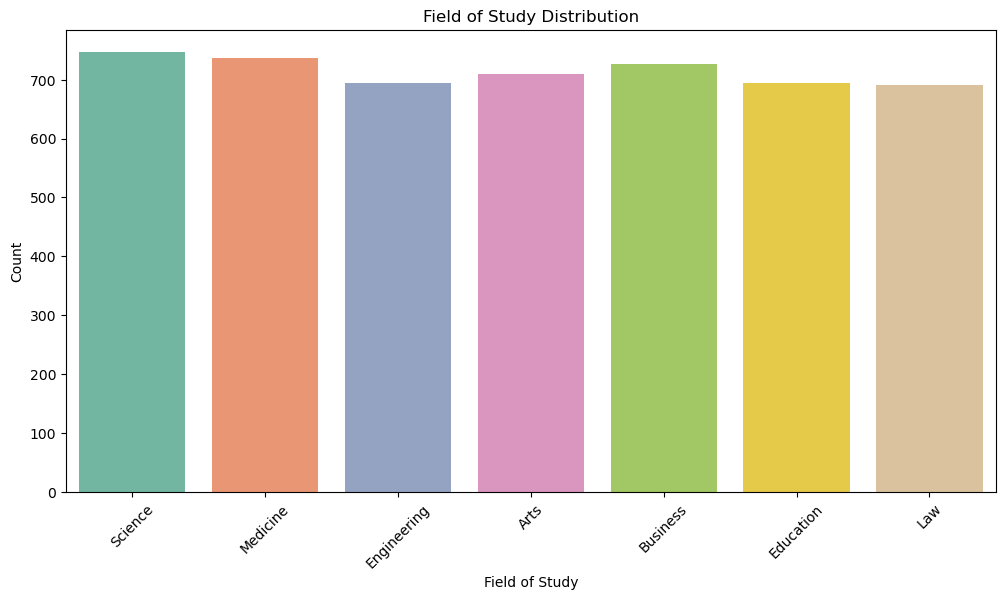

In [62]:
# Numerical output for Age Distribution
age_counts = df['age'].value_counts().sort_index()
print("Age Distribution:\n", age_counts)

# Visualization for Age Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='husl')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary and Visualization for Gender
print("Gender Distribution:\n", df['gender'].value_counts())

# Visualization for Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='gender', data=df, palette='Set2', dodge=False, legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Summary and Visualization for Region
print("Region Distribution:\n", df['region'].value_counts())

# Visualization for Region Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='region', data=df, palette='Set2', dodge=False, legend=False)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.show()

# Summary and Visualization for Field of Study
print("Field of Study Distribution:\n", df['field_of_study'].value_counts())

# Visualization for Field of Study Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='field_of_study', hue='field_of_study', data=df, palette='Set2', dodge=False, legend=False)
plt.title('Field of Study Distribution')
plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.show()

## Exploring numerical distribution

## Hours of VR usage per week distribution

Hours of VR Usage Per Week Distribution:
 hours_of_vr_usage_per_week
0     424
1     442
2     469
3     472
4     447
5     469
6     485
7     443
8     417
9     469
10    463
Name: count, dtype: int64


C:\Users\johan\AppData\Local\Temp\ipykernel_14820\2068845734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vr_usage_counts.index, y=vr_usage_counts.values, palette='husl')


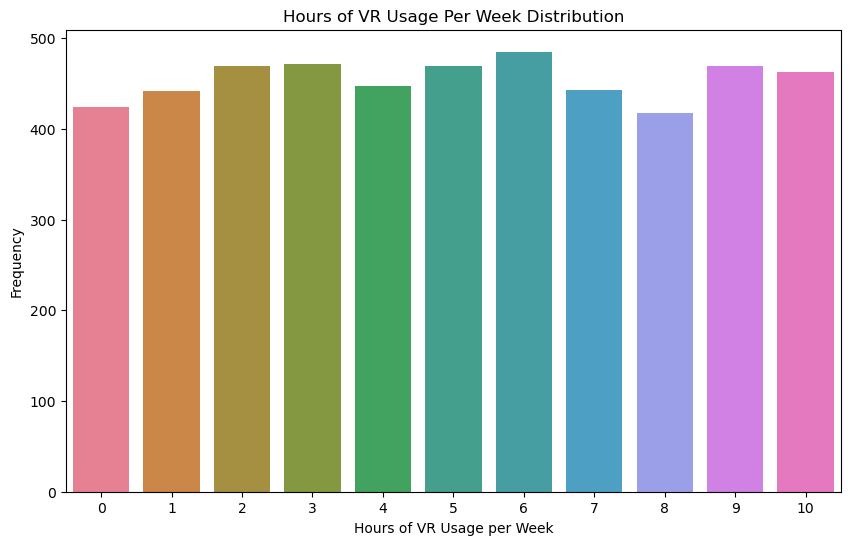

In [55]:
# Numerical output for Hours of VR Usage Per Week Distribution
vr_usage_counts = df['hours_of_vr_usage_per_week'].value_counts().sort_index()
print("Hours of VR Usage Per Week Distribution:\n", vr_usage_counts)

# Visualization for Hours of VR Usage Per Week Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=vr_usage_counts.index, y=vr_usage_counts.values, palette='husl')
plt.title('Hours of VR Usage Per Week Distribution')
plt.xlabel('Hours of VR Usage per Week')
plt.ylabel('Frequency')
plt.show()

## Engagement level distribution

Engagement Level Distribution:
 engagement_level
1    1007
2     963
3    1002
4     972
5    1056
Name: count, dtype: int64


C:\Users\johan\AppData\Local\Temp\ipykernel_14820\1279829961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_level_counts.index, y=engagement_level_counts.values, palette='husl')


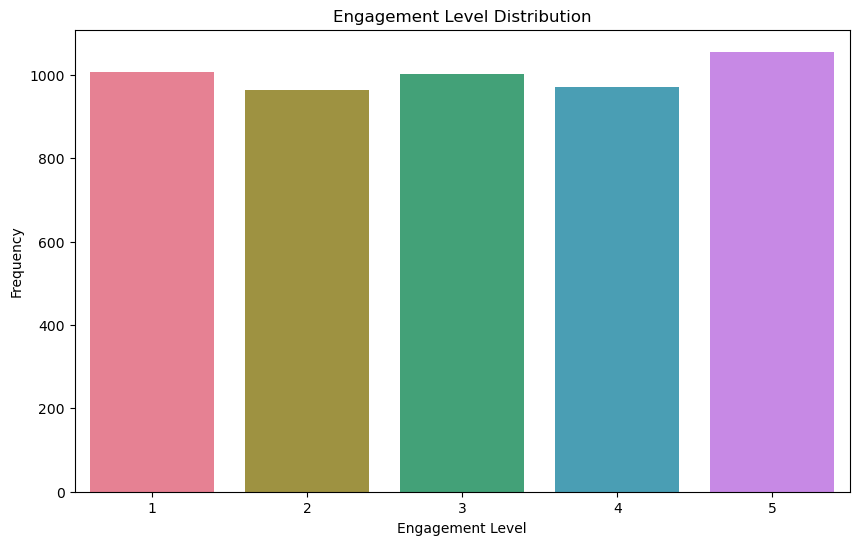

In [59]:
# Numerical output for Engagement Level Distribution
engagement_level_counts = df['engagement_level'].value_counts().sort_index()
print("Engagement Level Distribution:\n", engagement_level_counts)

# Visualization for Engagement Level Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_level_counts.index, y=engagement_level_counts.values, palette='husl')
plt.title('Engagement Level Distribution')
plt.xlabel('Engagement Level')
plt.ylabel('Frequency')
plt.show()

## Improvement in learning outcomes distribution

Improvement in Learning Outcomes Distribution:
 improvement_in_learning_outcomes
1    2512
0    2488
Name: count, dtype: int64


C:\Users\johan\AppData\Local\Temp\ipykernel_14820\810043176.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=learning_outcomes_counts.index, y=learning_outcomes_counts.values, palette='husl')


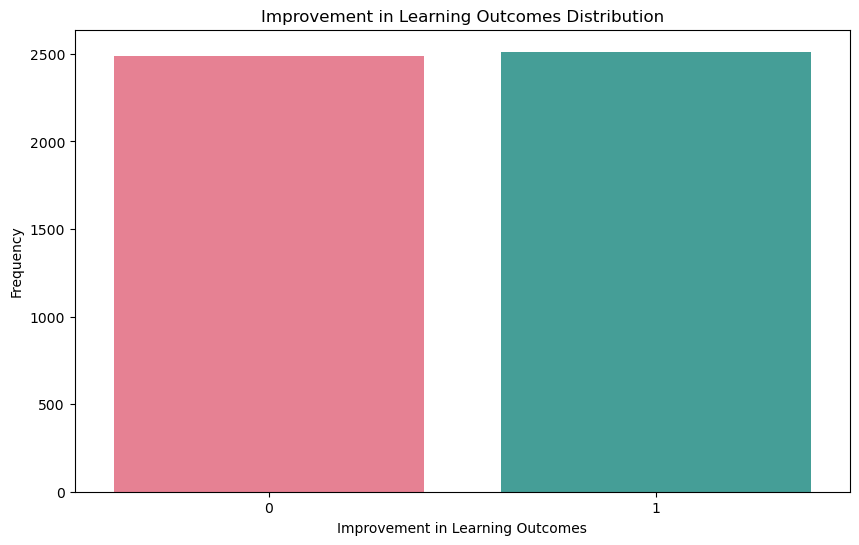

In [60]:
# Numerical output for Improvement in Learning Outcomes Distribution
learning_outcomes_counts = df['improvement_in_learning_outcomes'].value_counts()
print("Improvement in Learning Outcomes Distribution:\n", learning_outcomes_counts)

# Visualization for Improvement in Learning Outcomes Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=learning_outcomes_counts.index, y=learning_outcomes_counts.values, palette='husl')
plt.title('Improvement in Learning Outcomes Distribution')
plt.xlabel('Improvement in Learning Outcomes')
plt.ylabel('Frequency')
plt.show()

## Exploring relationship

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

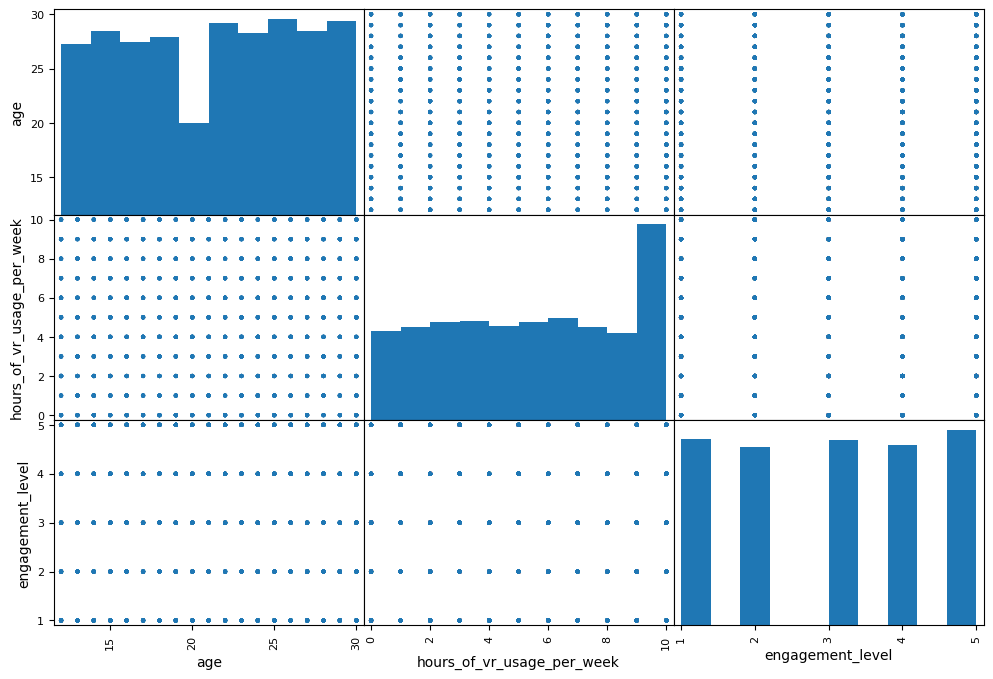

In [20]:
# Pairwise comparisons of numerical variables
pd.plotting.scatter_matrix(df[['age', 'hours_of_vr_usage_per_week', 'engagement_level', 'improvement_in_learning_outcomes']], figsize=(12, 8))
plt.show()

## Age vs Engagement level

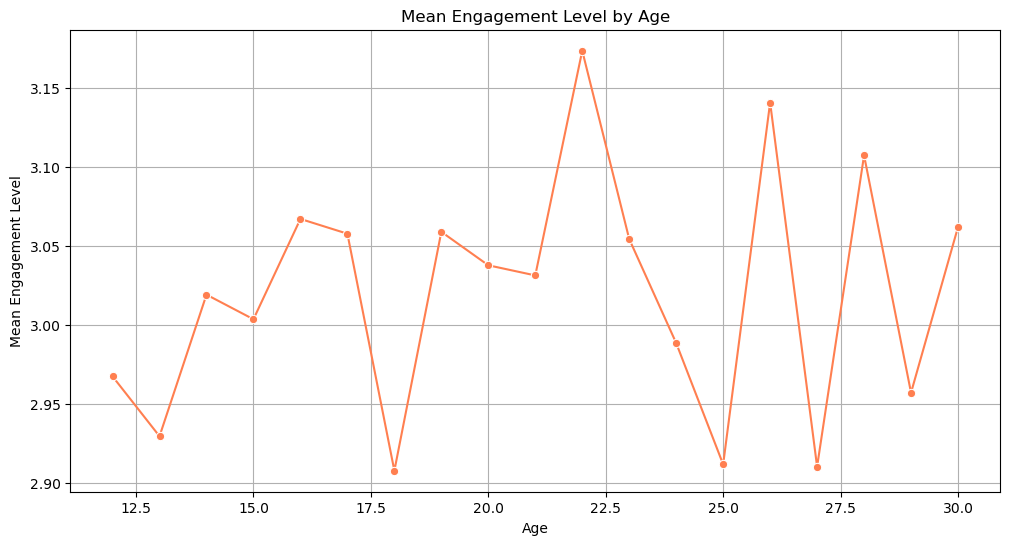

Mean Engagement Level by Age:
 age
12    2.967611
13    2.929752
14    3.019305
15    3.003745
16    3.067194
17    3.057851
18    2.907950
19    3.059041
20    3.037879
21    3.031469
22    3.173585
23    3.054475
24    2.988679
25    2.911972
26    3.140794
27    2.910506
28    3.107407
29    2.957295
30    3.062044
Name: engagement_level, dtype: float64


In [65]:
# Visualization: Age vs. Engagement Level
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_engagement_mean.index, y=age_engagement_mean.values, marker='o', color='coral')
plt.title('Mean Engagement Level by Age')
plt.xlabel('Age')
plt.ylabel('Mean Engagement Level')
plt.grid(True)
plt.show()
# Mean engagement level by age
age_engagement_mean = df.groupby('age')['engagement_level'].mean()
print("Mean Engagement Level by Age:\n", age_engagement_mean)

## Hours of VR usage per week vs Engagement level

Mean Engagement Level by Hours of VR Usage per Week:
 hours_of_vr_usage_per_week
0     2.995283
1     3.015837
2     3.055437
3     3.072034
4     2.955257
5     2.982942
6     3.006186
7     3.020316
8     3.050360
9     2.980810
10    3.099352
Name: engagement_level, dtype: float64


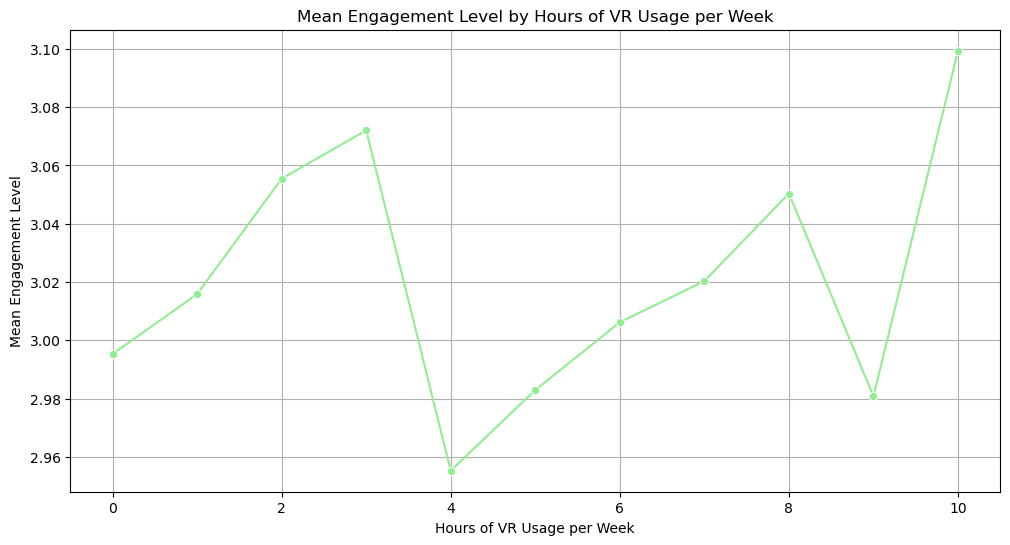

In [69]:
# Mean engagement level by hours of VR usage per week
vr_usage_engagement_mean = df.groupby('hours_of_vr_usage_per_week')['engagement_level'].mean()
print("Mean Engagement Level by Hours of VR Usage per Week:\n", vr_usage_engagement_mean)

# Visualization: Hours of VR Usage per Week vs. Engagement Level
plt.figure(figsize=(12, 6))
sns.lineplot(x=vr_usage_engagement_mean.index, y=vr_usage_engagement_mean.values, marker='o', color='lightgreen')
plt.title('Mean Engagement Level by Hours of VR Usage per Week')
plt.xlabel('Hours of VR Usage per Week')
plt.ylabel('Mean Engagement Level')
plt.grid(True)
plt.show()

## Improvement in learning outcomes vs Engagement level

Mean Engagement Level by Improvement in Learning Outcomes:
 improvement_in_learning_outcomes
0    3.034968
1    3.007962
Name: engagement_level, dtype: float64


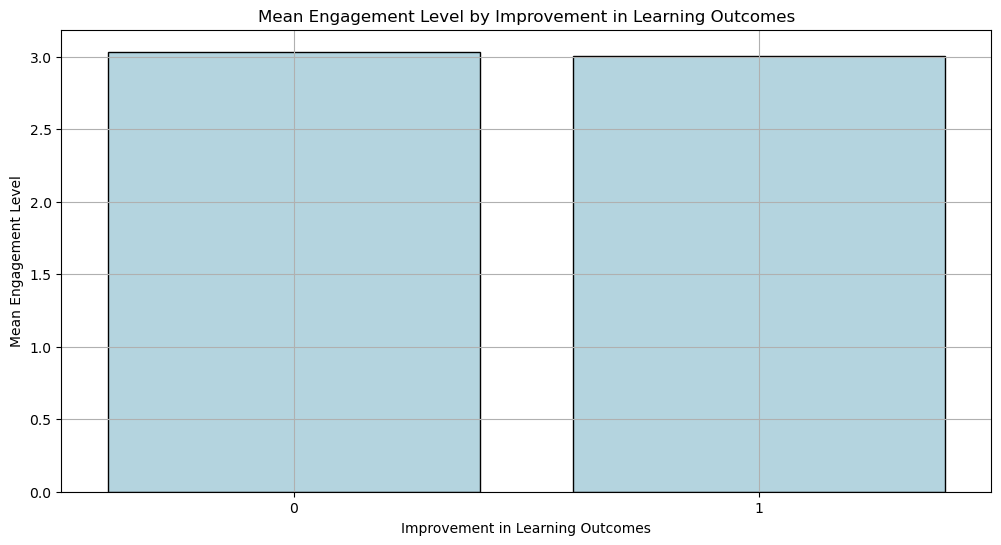

In [71]:
# Mean engagement level by improvement in learning outcomes
learning_outcomes_engagement_mean = df.groupby('improvement_in_learning_outcomes')['engagement_level'].mean()
print("Mean Engagement Level by Improvement in Learning Outcomes:\n", learning_outcomes_engagement_mean)

# Visualization: Improvement in Learning Outcomes vs. Engagement Level
plt.figure(figsize=(12, 6))
sns.barplot(x=learning_outcomes_engagement_mean.index, y=learning_outcomes_engagement_mean.values, color='lightblue', edgecolor='black')
plt.title('Mean Engagement Level by Improvement in Learning Outcomes')
plt.xlabel('Improvement in Learning Outcomes')
plt.ylabel('Mean Engagement Level')
plt.grid(True)
plt.show()

## Groupby and Aggregation

In [21]:
# One-Hot Encoding for categorical variables

df_encoded = pd.get_dummies(df, columns=[
    'gender',
    'grade_level',
    'field_of_study',
    'usage_of_vr_in_education',
    'improvement_in_learning_outcomes',
    'instructor_vr_proficiency',
    'access_to_vr_equipment',
    'interest_in_continuing_vr_based_learning',
    'region',
    'school_support_for_vr_in_curriculum'
], drop_first=True)

print(df_encoded.dtypes)  # Check the dtypes again to confirm encoding

student_id                                      object
age                                              int64
hours_of_vr_usage_per_week                       int64
engagement_level                                 int64
perceived_effectiveness_of_vr                    int64
impact_on_creativity                             int64
gender_Male                                       bool
gender_Non-binary                                 bool
gender_Prefer not to say                          bool
grade_level_Postgraduate                          bool
grade_level_Undergraduate                         bool
field_of_study_Business                           bool
field_of_study_Education                          bool
field_of_study_Engineering                        bool
field_of_study_Law                                bool
field_of_study_Medicine                           bool
field_of_study_Science                            bool
usage_of_vr_in_education_Yes                      bool
improvemen

In [22]:
df.dtypes

student_id                                  object
age                                          int64
gender                                      object
grade_level                                 object
field_of_study                              object
usage_of_vr_in_education                    object
hours_of_vr_usage_per_week                   int64
engagement_level                             int64
improvement_in_learning_outcomes            object
instructor_vr_proficiency                   object
perceived_effectiveness_of_vr                int64
access_to_vr_equipment                      object
impact_on_creativity                         int64
interest_in_continuing_vr_based_learning    object
region                                      object
school_support_for_vr_in_curriculum         object
dtype: object

In [25]:
# Normalize and map the columns
def normalize_and_map(column):
    # Ensure the column exists in the DataFrame
    if column in df.columns:
        # Normalize text by stripping whitespace and converting to lowercase
        df[column] = df[column].str.strip().str.lower()

        # Print unique values before mapping
        print(f"Unique values in '{column}' before mapping:", df[column].unique())
        
        # Convert 'yes' and 'no' to 1 and 0
        df[column] = df[column].map({'yes': 1, 'no': 0})
        
        # Handle any residual NaN values if necessary
        if df[column].isnull().sum() > 0:
            print(f"Number of null values in '{column}' after mapping:", df[column].isnull().sum())
            df[column] = df[column].fillna(0)  # Optionally fill NaN with a default value (e.g., 0)
        
        # Print unique values after mapping
        print(f"Unique values in '{column}' after mapping and handling NaNs:", df[column].unique())

# Columns to convert
columns_to_convert = [
    'improvement_in_learning_outcomes', 
    'usage_of_vr_in_education', 
    'access_to_vr_equipment', 
    'interest_in_continuing_vr_based_learning', 
    'school_support_for_vr_in_curriculum'
]

# Apply normalization and mapping
for column in columns_to_convert:
    normalize_and_map(column)

Unique values in 'improvement_in_learning_outcomes' before mapping: ['yes' 'no']
Unique values in 'improvement_in_learning_outcomes' after mapping and handling NaNs: [1 0]
Unique values in 'usage_of_vr_in_education' before mapping: ['no' 'yes']
Unique values in 'usage_of_vr_in_education' after mapping and handling NaNs: [0 1]
Unique values in 'access_to_vr_equipment' before mapping: ['yes' 'no']
Unique values in 'access_to_vr_equipment' after mapping and handling NaNs: [1 0]
Unique values in 'interest_in_continuing_vr_based_learning' before mapping: ['no' 'yes']
Unique values in 'interest_in_continuing_vr_based_learning' after mapping and handling NaNs: [0 1]
Unique values in 'school_support_for_vr_in_curriculum' before mapping: ['no' 'yes']
Unique values in 'school_support_for_vr_in_curriculum' after mapping and handling NaNs: [0 1]


In [26]:
print("Data types after conversion:\n", df.dtypes)

Data types after conversion:
 student_id                                  object
age                                          int64
gender                                      object
grade_level                                 object
field_of_study                              object
usage_of_vr_in_education                     int64
hours_of_vr_usage_per_week                   int64
engagement_level                             int64
improvement_in_learning_outcomes             int64
instructor_vr_proficiency                   object
perceived_effectiveness_of_vr                int64
access_to_vr_equipment                       int64
impact_on_creativity                         int64
interest_in_continuing_vr_based_learning     int64
region                                      object
school_support_for_vr_in_curriculum          int64
dtype: object


Mean Engagement Level and Improvement in Learning Outcomes by Gender:
                    engagement_level  improvement_in_learning_outcomes
gender                                                               
Female                     3.050820                          0.538525
Male                       3.018053                          0.497645
Non-binary                 3.046457                          0.501575
Prefer not to say          2.970065                          0.472492
Mean Engagement Level and Improvement in Learning Outcomes by Region:
                engagement_level  improvement_in_learning_outcomes
region                                                           
Africa                 3.047619                          0.516667
Asia                   2.976553                          0.488863
Europe                 2.988984                          0.489596
North America          2.987923                          0.510870
Oceania                3.045340           

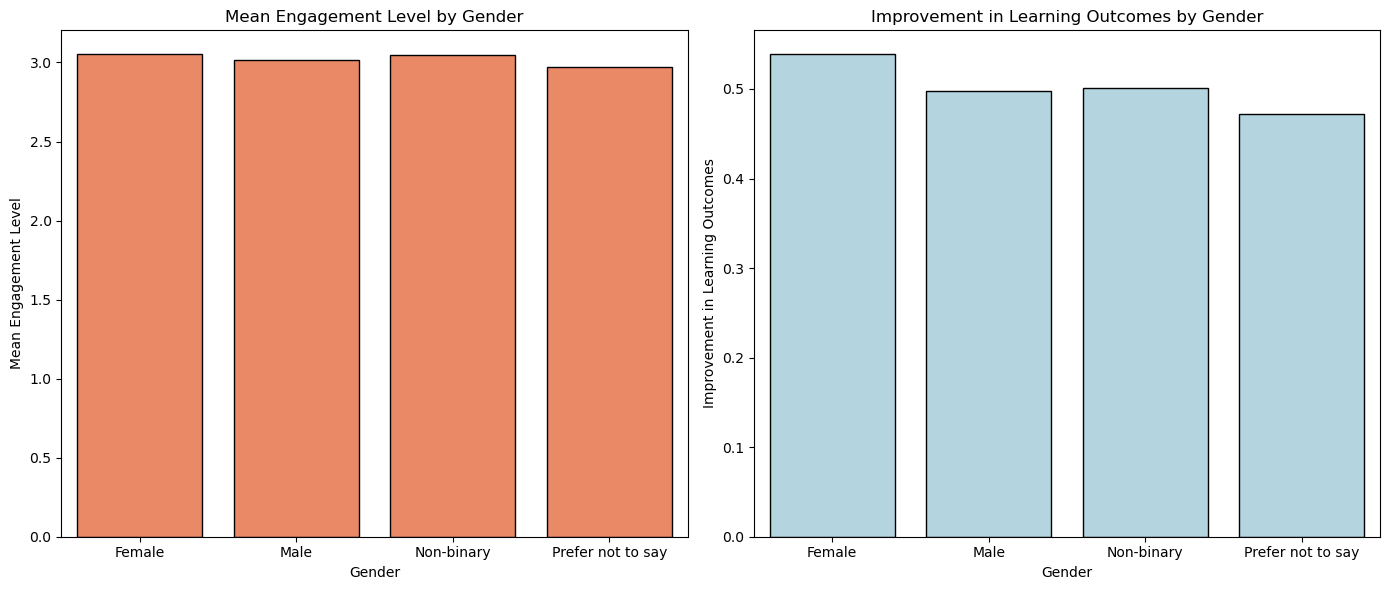

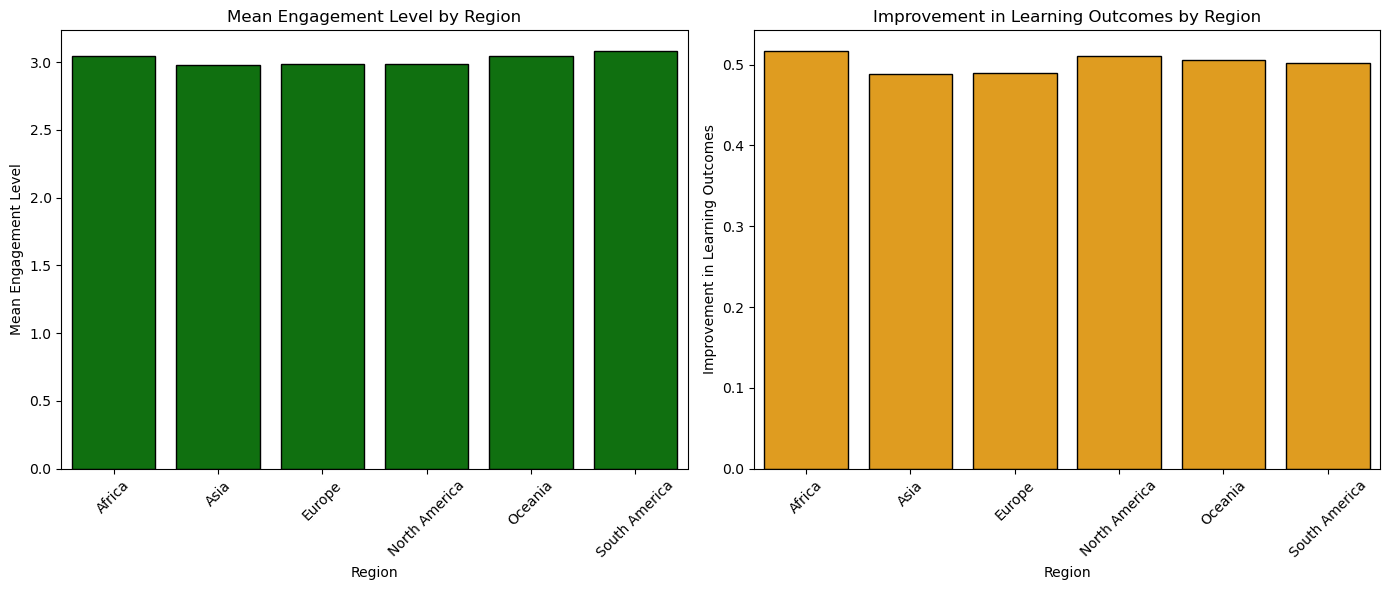

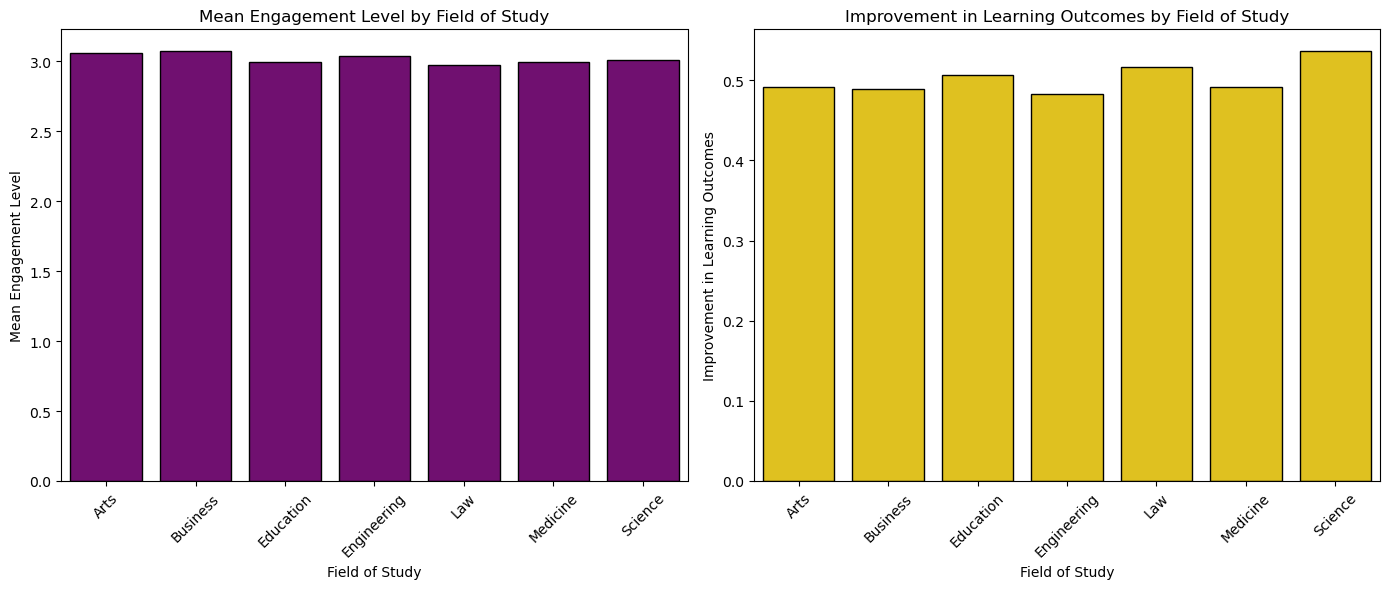

In [74]:
# Aggregating by gender
gender_grouped = df.groupby('gender')[['engagement_level', 'improvement_in_learning_outcomes']].mean()
print("Mean Engagement Level and Improvement in Learning Outcomes by Gender:\n", gender_grouped)

# Aggregating by region
region_grouped = df.groupby('region')[['engagement_level', 'improvement_in_learning_outcomes']].mean()
print("Mean Engagement Level and Improvement in Learning Outcomes by Region:\n", region_grouped)

# Aggregating by field of study
field_grouped = df.groupby('field_of_study')[['engagement_level', 'improvement_in_learning_outcomes']].mean()
print("Mean Engagement Level and Improvement in Learning Outcomes by Field of Study:\n", field_grouped)

# 1. Visualization - Mean Engagement Level and Improvement by Gender
# Calculate mean engagement level and improvement in learning outcomes by gender
gender_grouped = df.groupby('gender')[['engagement_level', 'improvement_in_learning_outcomes']].mean()

plt.figure(figsize=(14, 6))

# Mean Engagement Level by Gender
plt.subplot(1, 2, 1)
sns.barplot(x=gender_grouped.index, y=gender_grouped['engagement_level'], color='coral', edgecolor='black')
plt.title('Mean Engagement Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Engagement Level')

# Improvement in Learning Outcomes by Gender
plt.subplot(1, 2, 2)
sns.barplot(x=gender_grouped.index, y=gender_grouped['improvement_in_learning_outcomes'], color='lightblue', edgecolor='black')
plt.title('Improvement in Learning Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Improvement in Learning Outcomes')

plt.tight_layout()
plt.show()

# Calculate mean engagement level and improvement in learning outcomes by region
region_grouped = df.groupby('region')[['engagement_level', 'improvement_in_learning_outcomes']].mean()

plt.figure(figsize=(14, 6))

# Mean Engagement Level by Region
plt.subplot(1, 2, 1)
sns.barplot(x=region_grouped.index, y=region_grouped['engagement_level'], color='green', edgecolor='black')
plt.title('Mean Engagement Level by Region')
plt.xlabel('Region')
plt.ylabel('Mean Engagement Level')
plt.xticks(rotation=45)

# Improvement in Learning Outcomes by Region
plt.subplot(1, 2, 2)
sns.barplot(x=region_grouped.index, y=region_grouped['improvement_in_learning_outcomes'], color='orange', edgecolor='black')
plt.title('Improvement in Learning Outcomes by Region')
plt.xlabel('Region')
plt.ylabel('Improvement in Learning Outcomes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate mean engagement level and improvement in learning outcomes by field of study
field_grouped = df.groupby('field_of_study')[['engagement_level', 'improvement_in_learning_outcomes']].mean()

plt.figure(figsize=(14, 6))

# Mean Engagement Level by Field of Study
plt.subplot(1, 2, 1)
sns.barplot(x=field_grouped.index, y=field_grouped['engagement_level'], color='purple', edgecolor='black')
plt.title('Mean Engagement Level by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Mean Engagement Level')
plt.xticks(rotation=45)

# Improvement in Learning Outcomes by Field of Study
plt.subplot(1, 2, 2)
sns.barplot(x=field_grouped.index, y=field_grouped['improvement_in_learning_outcomes'], color='gold', edgecolor='black')
plt.title('Improvement in Learning Outcomes by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Improvement in Learning Outcomes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Gender Distribution Within Each Region:
 gender         Female  Male  Non-binary  Prefer not to say
region                                                    
Africa            205   227         202                206
Asia              205   226         212                210
Europe            192   198         215                212
North America     206   195         216                211
Oceania           217   196         196                185
South America     195   232         229                212
Mean Engagement Level by Gender Within Each Region:
 gender           Female      Male  Non-binary  Prefer not to say
region                                                          
Africa         3.034146  3.048458    3.034653           3.072816
Asia           3.000000  3.000000    2.995283           2.909524
Europe         3.005208  2.893939    3.097674           2.952830
North America  3.053398  2.882051    3.041667           2.966825
Oceania        3.059908  3.096939    3.05102

<Figure size 1200x800 with 0 Axes>

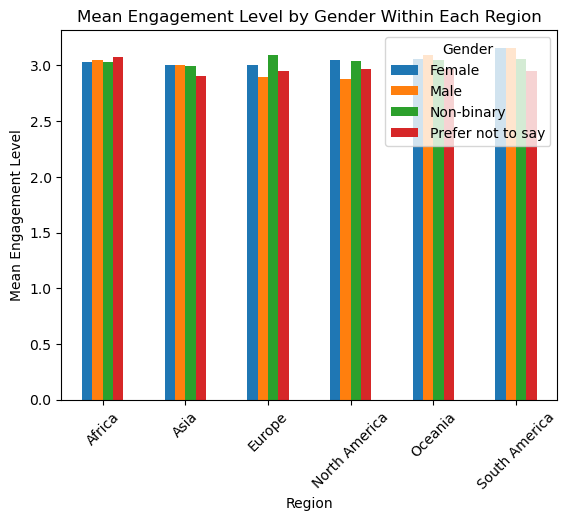

In [28]:
# Analyzing Gender Distribution Within Each Region
gender_region_crosstab = pd.crosstab(df['region'], df['gender'])
print("Gender Distribution Within Each Region:\n", gender_region_crosstab)

# Groupby and Aggregation: Mean Engagement Level by Gender Within Each Region
gender_region_grouped = df.groupby(['region', 'gender'])['engagement_level'].mean().unstack()
print("Mean Engagement Level by Gender Within Each Region:\n", gender_region_grouped)

# Visualization: Engagement Level by Gender Within Each Region
plt.figure(figsize=(12, 8))
gender_region_grouped.plot(kind='bar')
plt.title('Mean Engagement Level by Gender Within Each Region')
plt.xlabel('Region')
plt.ylabel('Mean Engagement Level')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# KPIs

In [76]:
## Engagement level

Engagement Level Summary:
 count    5000.000000
mean        3.021400
std         1.427358
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: engagement_level, dtype: float64


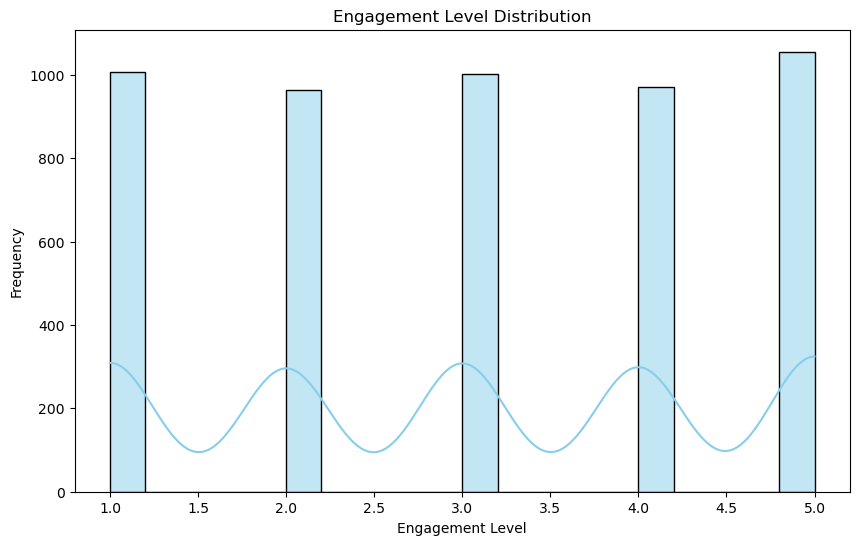

In [75]:
# Numerical Analysis for Engagement Level
print("Engagement Level Summary:\n", df['engagement_level'].describe())

# Visual Analysis for Engagement Level
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_level'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Engagement Level Distribution')
plt.xlabel('Engagement Level')
plt.ylabel('Frequency')
plt.show()

## Improvement in learning outcomes

Improvement in Learning Outcomes Summary (No/Yes):
 improvement_in_learning_outcomes
1    0.5024
0    0.4976
Name: proportion, dtype: float64


C:\Users\johan\AppData\Local\Temp\ipykernel_14820\462884509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='improvement_in_learning_outcomes', data=df, palette='Set2')


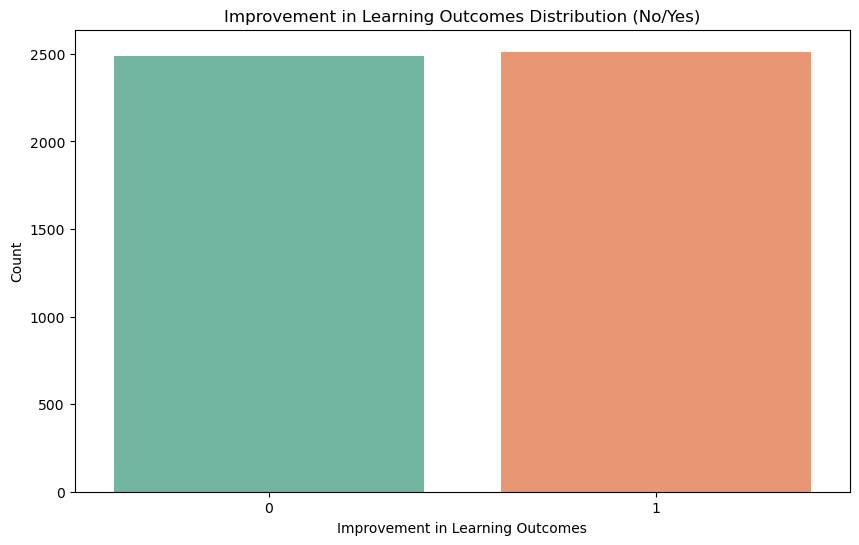

In [77]:
# Numerical Analysis for Improvement in Learning Outcomes
print("Improvement in Learning Outcomes Summary (No/Yes):\n", df['improvement_in_learning_outcomes'].value_counts(normalize=True))

# Visual Analysis for Improvement in Learning Outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x='improvement_in_learning_outcomes', data=df, palette='Set2')
plt.title('Improvement in Learning Outcomes Distribution (No/Yes)')
plt.xlabel('Improvement in Learning Outcomes')
plt.ylabel('Count')
plt.show()

## Usage per week

VR Usage Hours Per Week Summary:
 count    5000.000000
mean        5.025400
std         3.140816
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: hours_of_vr_usage_per_week, dtype: float64


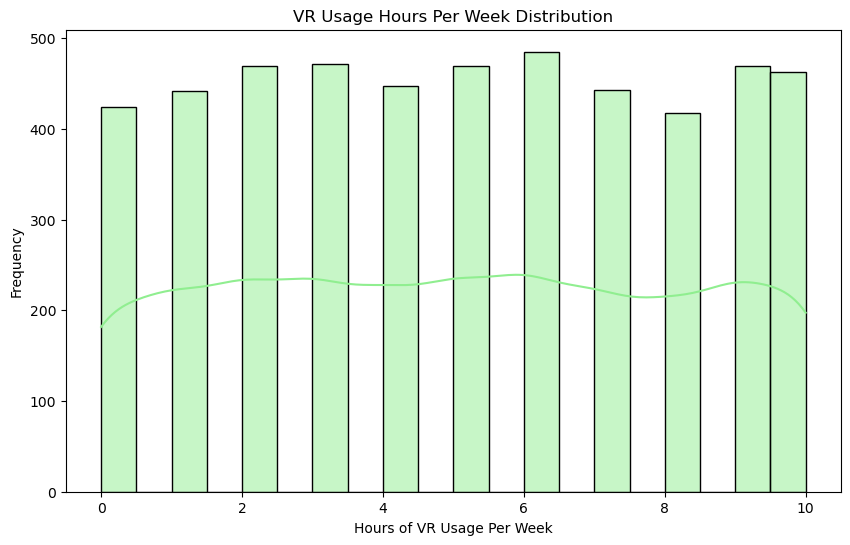

In [78]:
# Numerical Analysis for VR Usage Hours Per Week
print("VR Usage Hours Per Week Summary:\n", df['hours_of_vr_usage_per_week'].describe())

# Visual Analysis for VR Usage Hours Per Week
plt.figure(figsize=(10, 6))
sns.histplot(df['hours_of_vr_usage_per_week'], bins=20, kde=True, color='lightgreen', edgecolor='black')
plt.title('VR Usage Hours Per Week Distribution')
plt.xlabel('Hours of VR Usage Per Week')
plt.ylabel('Frequency')
plt.show()

In [81]:
## Creativity impact

Creativity Impact Summary:
 count    5000.000000
mean        3.019600
std         1.437508
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: impact_on_creativity, dtype: float64


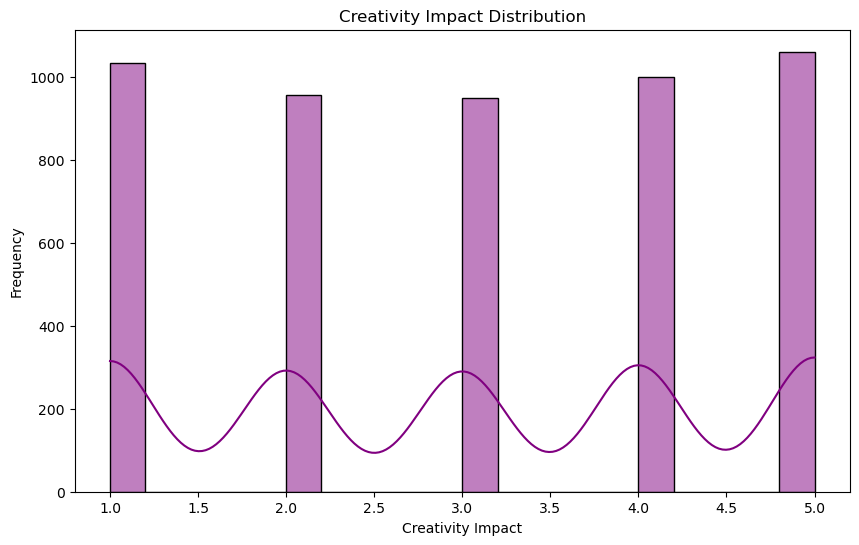

In [83]:
# Numerical Analysis for Creativity Impact
print("Creativity Impact Summary:\n", df['impact_on_creativity'].describe())

# Visual Analysis for Creativity Impact
plt.figure(figsize=(10, 6))
sns.histplot(df['impact_on_creativity'], bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Creativity Impact Distribution')
plt.xlabel('Creativity Impact')
plt.ylabel('Frequency')
plt.show()

## Ressource allocation and optimization

** School support  and access to VR equipment

** Engagement level and learning outcomes by school support

Mean Engagement Level and Improvement in Learning Outcomes by School Support:
                                      engagement_level  \
school_support_for_vr_in_curriculum                     
0                                            3.036704   
1                                            3.005330   

                                     improvement_in_learning_outcomes  
school_support_for_vr_in_curriculum                                    
0                                                            0.494729  
1                                                            0.510455  


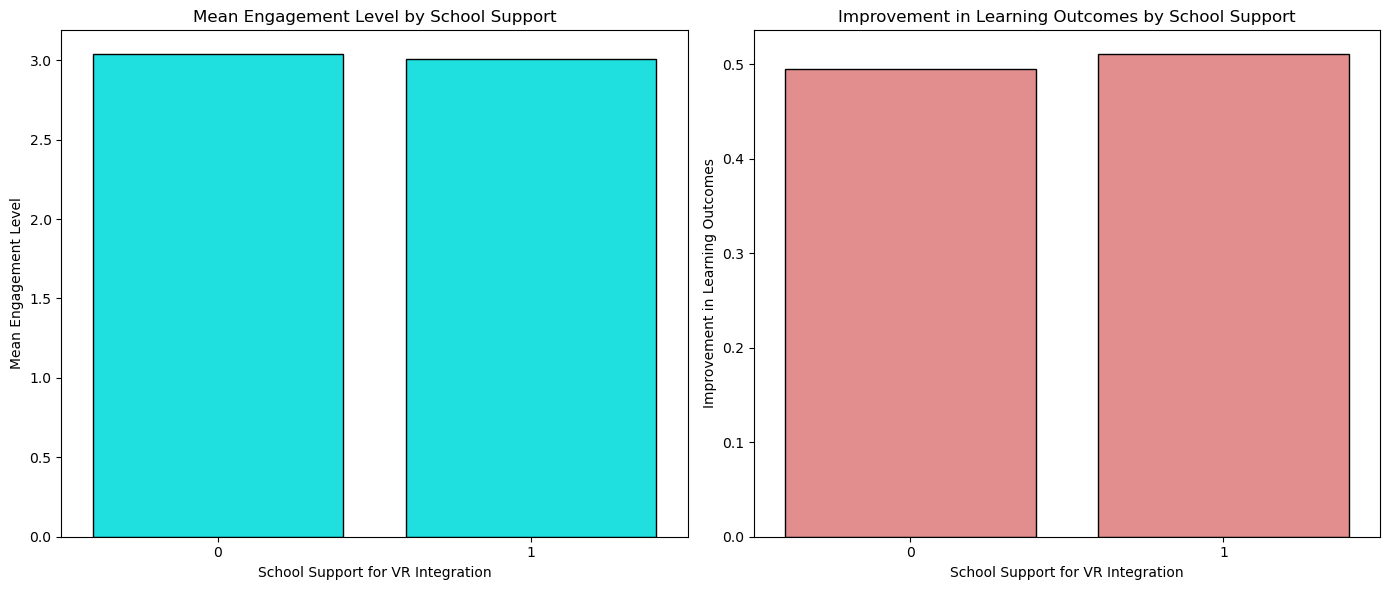

In [84]:
# Calculate mean engagement level and improvement in learning outcomes by school support
support_grouped = df.groupby('school_support_for_vr_in_curriculum')[['engagement_level', 'improvement_in_learning_outcomes']].mean()

print("Mean Engagement Level and Improvement in Learning Outcomes by School Support:\n", support_grouped)

# Visualization: School Support for VR Integration
plt.figure(figsize=(14, 6))

# Mean Engagement Level by School Support
plt.subplot(1, 2, 1)
sns.barplot(x=support_grouped.index, y=support_grouped['engagement_level'], color='cyan', edgecolor='black')
plt.title('Mean Engagement Level by School Support')
plt.xlabel('School Support for VR Integration')
plt.ylabel('Mean Engagement Level')

# Improvement in Learning Outcomes by School Support
plt.subplot(1, 2, 2)
sns.barplot(x=support_grouped.index, y=support_grouped['improvement_in_learning_outcomes'], color='lightcoral', edgecolor='black')
plt.title('Improvement in Learning Outcomes by School Support')
plt.xlabel('School Support for VR Integration')
plt.ylabel('Improvement in Learning Outcomes')

plt.tight_layout()
plt.show()

** Engagement level and learning outcomes by access to VR equipment

Mean Engagement Level and Improvement in Learning Outcomes by Access to VR Equipment:
                         engagement_level  improvement_in_learning_outcomes
access_to_vr_equipment                                                    
0                               3.053485                          0.506483
1                               2.990126                          0.498420


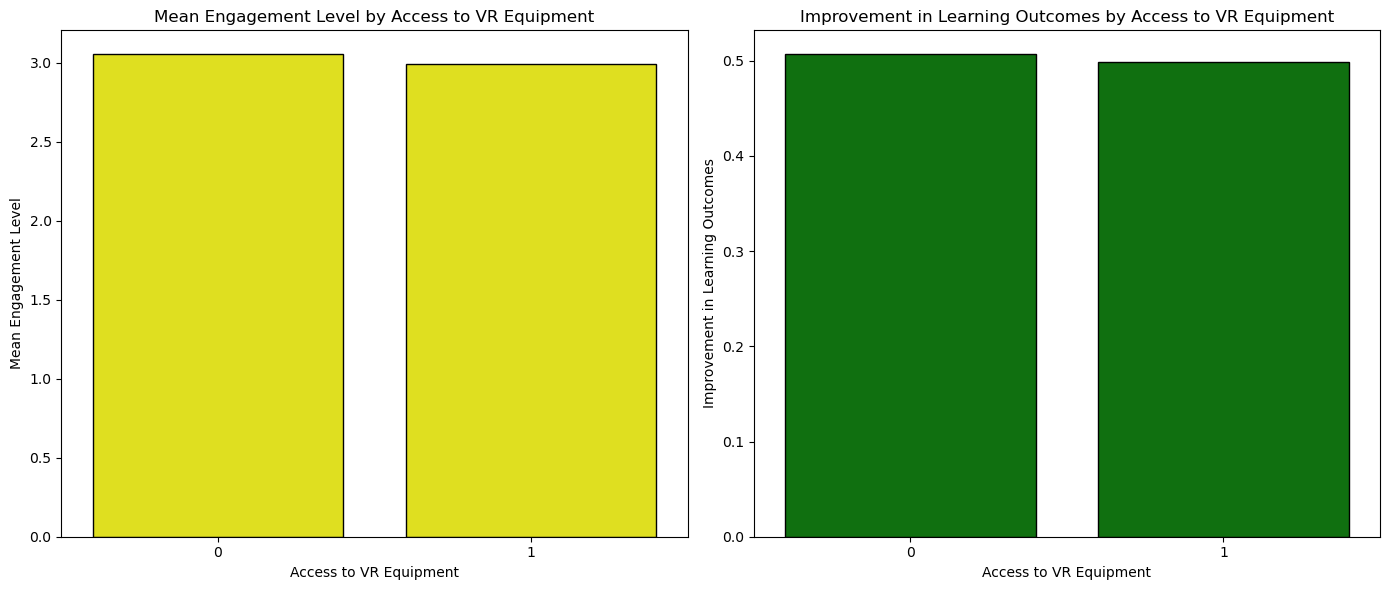

In [85]:
# Calculate mean engagement level and improvement in learning outcomes by access to VR equipment
access_grouped = df.groupby('access_to_vr_equipment')[['engagement_level', 'improvement_in_learning_outcomes']].mean()

print("Mean Engagement Level and Improvement in Learning Outcomes by Access to VR Equipment:\n", access_grouped)

# Visualization: Access to VR Equipment
plt.figure(figsize=(14, 6))

# Mean Engagement Level by Access to VR Equipment
plt.subplot(1, 2, 1)
sns.barplot(x=access_grouped.index, y=access_grouped['engagement_level'], color='yellow', edgecolor='black')
plt.title('Mean Engagement Level by Access to VR Equipment')
plt.xlabel('Access to VR Equipment')
plt.ylabel('Mean Engagement Level')

# Improvement in Learning Outcomes by Access to VR Equipment
plt.subplot(1, 2, 2)
sns.barplot(x=access_grouped.index, y=access_grouped['improvement_in_learning_outcomes'], color='green', edgecolor='black')
plt.title('Improvement in Learning Outcomes by Access to VR Equipment')
plt.xlabel('Access to VR Equipment')
plt.ylabel('Improvement in Learning Outcomes')

plt.tight_layout()
plt.show()